In [1]:
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from category_encoders import TargetEncoder
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce

In [2]:
train = pd.read_csv('train_adikara2024.csv')
test = pd.read_csv('test_adikara2024_unlabeled.csv')
train

,id,Country,Year,Month,FoodPriceIndex
0,3501,Mexico,1971,11,0.0000
1,60601,South Africa,2002,7,43.9000
2,64399,Japan,2004,8,89.8000
3,24227,France,1983,1,48.9000
4,63779,Japan,2004,4,90.2000
...,...,...,...,...,...
11611,8347,Sweden,1974,6,17.9000
11612,32121,Germany,1987,4,66.1407
11613,8561,Germany,1974,8,45.1606
11614,45917,Denmark,1994,9,65.6000


In [3]:
test

,id,Country,Year,Month
0,99116,Italy,2023,4
1,97687,Denmark,2022,7
2,92061,United States,2019,6
3,95122,Netherlands,2021,2
4,92296,Italy,2019,8
...,...,...,...,...
2635,96922,France,2022,2
2636,93502,Denmark,2020,4
2637,87476,Greece,2017,1
2638,93366,Greece,2020,3


# Checking data train

In [4]:
print("Train Data missing values:")
print(train.isna().sum())

print("Train Data duplicated: ", train.duplicated().sum())
print('-'*50)

print("Train Data Length: ", len(train))

Train Data missing values:
id                  0
Country             0
Year                0
Month               0
FoodPriceIndex    348
dtype: int64
Train Data duplicated:  0
--------------------------------------------------
Train Data Length:  11616


In [5]:
proportion_missing = train.isna().sum() / len(train)
print(proportion_missing)

id                0.000000
Country           0.000000
Year              0.000000
Month             0.000000
FoodPriceIndex    0.029959
dtype: float64


In [6]:
# from sklearn.preprocessing import LabelEncoder

# # Initialize the LabelEncoder
# le = LabelEncoder()

# # Fit and transform the 'Country' column
# train['Country'] = le.fit_transform(train['Country'])


In [7]:
# train_missing = train[train['FoodPriceIndex'].isna()]
# train_not_missing = train[~train['FoodPriceIndex'].isna()]

In [8]:
# from category_encoders import TargetEncoder

# # Initialize and fit TargetEncoder on non-missing data
# te = TargetEncoder(cols=['Country'])
# train_not_missing['Country'] = te.fit_transform(
#     train_not_missing['Country'], 
#     train_not_missing['FoodPriceIndex']
# )

# # Apply the same transformation to rows with missing target
# train_missing['Country'] = te.transform(train_missing['Country'])


In [9]:
# from category_encoders import TargetEncoder

# # Initialize the TargetEncoder
# te = TargetEncoder(cols=['Country'])

# # Fit the encoder on the training data
# train['Country'] = te.fit_transform(train[['Country']], train['FoodPriceIndex'])

In [10]:
# from sklearn.ensemble import RandomForestRegressor
# # Combine encoded data
# train = pd.concat([train_not_missing, train_missing])

# # Features for Random Forest
# features = ['Year', 'Month', 'Country']

# # Train Random Forest on non-missing data
# rf = RandomForestRegressor(random_state=42)
# rf.fit(train_not_missing[features], train_not_missing['FoodPriceIndex'])

# # Predict missing values
# predictions = rf.predict(train_missing[features])

# # Fill missing values
# train.loc[train['FoodPriceIndex'].isna(), 'FoodPriceIndex'] = predictions

# print("Number of missing values after imputation:", train['FoodPriceIndex'].isna().sum())


In [11]:
train.dropna(subset=['FoodPriceIndex'], inplace=True)

In [12]:
train

,id,Country,Year,Month,FoodPriceIndex
0,3501,Mexico,1971,11,0.0000
1,60601,South Africa,2002,7,43.9000
2,64399,Japan,2004,8,89.8000
3,24227,France,1983,1,48.9000
4,63779,Japan,2004,4,90.2000
...,...,...,...,...,...
11611,8347,Sweden,1974,6,17.9000
11612,32121,Germany,1987,4,66.1407
11613,8561,Germany,1974,8,45.1606
11614,45917,Denmark,1994,9,65.6000


In [13]:
print(train.isna().sum())

id                0
Country           0
Year              0
Month             0
FoodPriceIndex    0
dtype: int64


In [14]:
# # train['FoodPriceIndex'] = train['FoodPriceIndex'].fillna(train['FoodPriceIndex'].mean())
# # Menghapus baris dengan missing value
# train.dropna(subset=['FoodPriceIndex'], inplace=True)

# print(train.isna().sum())

In [15]:
train[train['FoodPriceIndex'] == 0].shape

(475, 5)

In [16]:
# train['FoodPriceIndex'] = train['FoodPriceIndex'].replace(0, np.nan)

In [17]:
# print("Train Data missing values:")
# print(train.isna().sum())

# print("Train Data duplicated: ", train.duplicated().sum())
# print('-'*50)

# print("Train Data Length: ", len(train))

In [18]:
# # train['FoodPriceIndex'] = train['FoodPriceIndex'].fillna(train['FoodPriceIndex'].mean())
# # Menghapus baris dengan missing value
# train.dropna(subset=['FoodPriceIndex'], inplace=True)

# print(train.isna().sum())

In [19]:
len(train)

11268

# Checking data test

In [20]:
print("Test Data missing values:")
print(test.isna().sum())

print("Test Data duplicated: ", test.duplicated().sum())

print('-'*50)

print("Test Data Length: ", len(test))

Test Data missing values:
id         0
Country    0
Year       0
Month      0
dtype: int64
Test Data duplicated:  0
--------------------------------------------------
Test Data Length:  2640


## Feature engineering

In [21]:
train['Quarter'] = (train['Month'] - 1) // 3 + 1
test['Quarter'] = (test['Month'] - 1) // 3 + 1

train['Month_Sin'] = np.sin(2 * np.pi * train['Month'] / 12)
train['Month_Cos'] = np.cos(2 * np.pi * train['Month'] / 12)

test['Month_Sin'] = np.sin(2 * np.pi * test['Month'] / 12)
test['Month_Cos'] = np.cos(2 * np.pi * test['Month'] / 12)

train['Is_Peak_Season'] = train['Quarter'].isin([1, 4]).astype(int)  # Asumsi musim panen di kuartal 1 & 4
test['Is_Peak_Season'] = test['Quarter'].isin([1, 4]).astype(int)  # Asumsi musim panen di kuartal 1 & 4

train['Quarter_Sin'] = np.sin(2 * np.pi * train['Quarter'] / 4)
train['Quarter_Cos'] = np.cos(2 * np.pi * train['Quarter'] / 4)
test['Quarter_Sin'] = np.sin(2 * np.pi * test['Quarter'] / 4)
test['Quarter_Cos'] = np.cos(2 * np.pi * test['Quarter'] / 4)

train['Semester'] = (train['Month'] - 1) // 6 + 1
test['Semester'] = (test['Month'] - 1) // 6 + 1

train['Elapsed_Months'] = (train['Year'] - train['Year'].min()) * 12 + (train['Month'] - 1) #ngaruh tpi malah turun
test['Elapsed_Months'] = (test['Year'] - train['Year'].min()) * 12 + (test['Month'] - 1) #ngaruh tpi malah turun

country_avg = train.groupby('Country')['FoodPriceIndex'].mean()
train['Country_AvgPrice'] = train['Country'].map(country_avg)
test['Country_AvgPrice'] = test['Country'].map(country_avg)

train['Month_Quarter_Interaction'] = train['Month'] * train['Quarter']
test['Month_Quarter_Interaction'] = test['Month'] * test['Quarter']

train['Country_Semester_Interaction'] = train['Country_AvgPrice'] * train['Semester']
test['Country_Semester_Interaction'] = test['Country_AvgPrice'] * test['Semester']



In [22]:
train

,id,Country,Year,Month,FoodPriceIndex,Quarter,Month_Sin,Month_Cos,Is_Peak_Season,Quarter_Sin,Quarter_Cos,Semester,Elapsed_Months,Country_AvgPrice,Month_Quarter_Interaction,Country_Semester_Interaction
0,3501,Mexico,1971,11,0.0000,4,-5.000000e-01,8.660254e-01,1,-2.449294e-16,1.000000e+00,2,22,25.490485,44,50.980971
1,60601,South Africa,2002,7,43.9000,3,-5.000000e-01,-8.660254e-01,0,-1.000000e+00,-1.836970e-16,2,390,25.660707,21,51.321415
2,64399,Japan,2004,8,89.8000,3,-8.660254e-01,-5.000000e-01,0,-1.000000e+00,-1.836970e-16,2,415,80.070155,24,160.140310
3,24227,France,1983,1,48.9000,1,5.000000e-01,8.660254e-01,1,1.000000e+00,6.123234e-17,1,156,62.355750,1,62.355750
4,63779,Japan,2004,4,90.2000,2,8.660254e-01,-5.000000e-01,0,1.224647e-16,-1.000000e+00,1,411,80.070155,8,80.070155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11611,8347,Sweden,1974,6,17.9000,2,1.224647e-16,-1.000000e+00,0,1.224647e-16,-1.000000e+00,1,53,61.974369,12,61.974369
11612,32121,Germany,1987,4,66.1407,2,8.660254e-01,-5.000000e-01,0,1.224647e-16,-1.000000e+00,1,207,68.830241,8,68.830241
11613,8561,Germany,1974,8,45.1606,3,-8.660254e-01,-5.000000e-01,0,-1.000000e+00,-1.836970e-16,2,55,68.830241,24,137.660483
11614,45917,Denmark,1994,9,65.6000,3,-1.000000e+00,-1.836970e-16,0,-1.000000e+00,-1.836970e-16,2,296,59.473870,27,118.947741


In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11268 entries, 0 to 11615
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            11268 non-null  int64  
 1   Country                       11268 non-null  object 
 2   Year                          11268 non-null  int64  
 3   Month                         11268 non-null  int64  
 4   FoodPriceIndex                11268 non-null  float64
 5   Quarter                       11268 non-null  int64  
 6   Month_Sin                     11268 non-null  float64
 7   Month_Cos                     11268 non-null  float64
 8   Is_Peak_Season                11268 non-null  int32  
 9   Quarter_Sin                   11268 non-null  float64
 10  Quarter_Cos                   11268 non-null  float64
 11  Semester                      11268 non-null  int64  
 12  Elapsed_Months                11268 non-null  int64  
 13  Countr

In [24]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2640 entries, 0 to 2639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            2640 non-null   int64  
 1   Country                       2640 non-null   object 
 2   Year                          2640 non-null   int64  
 3   Month                         2640 non-null   int64  
 4   Quarter                       2640 non-null   int64  
 5   Month_Sin                     2640 non-null   float64
 6   Month_Cos                     2640 non-null   float64
 7   Is_Peak_Season                2640 non-null   int32  
 8   Quarter_Sin                   2640 non-null   float64
 9   Quarter_Cos                   2640 non-null   float64
 10  Semester                      2640 non-null   int64  
 11  Elapsed_Months                2640 non-null   int64  
 12  Country_AvgPrice              2640 non-null   float64
 13  Mon

# EDA

In [25]:
num_cols = train.select_dtypes(include=[np.number]).columns
cat_cols = train.select_dtypes(exclude=[np.number]).columns

print('Numerical Columns: ', num_cols)
print('Categorical Columns: ', cat_cols)

Numerical Columns:  Index(['id', 'Year', 'Month', 'FoodPriceIndex', 'Quarter', 'Month_Sin',
       'Month_Cos', 'Is_Peak_Season', 'Quarter_Sin', 'Quarter_Cos', 'Semester',
       'Elapsed_Months', 'Country_AvgPrice', 'Month_Quarter_Interaction',
       'Country_Semester_Interaction'],
      dtype='object')
Categorical Columns:  Index(['Country'], dtype='object')


In [26]:
train['Country'].value_counts()

Country
Finland           519
Germany           516
Japan             516
Mexico            515
Greece            515
Sweden            515
Turkey            514
Portugal          513
France            513
Spain             513
Italy             513
Israel            513
United Kingdom    512
Austria           511
Canada            511
Taiwan, China     511
Denmark           509
South Africa      509
Netherlands       509
United States     509
Switzerland       508
Luxembourg        504
Name: count, dtype: int64

In [27]:
test['Country'].value_counts()

Country
Italy             120
Denmark           120
Luxembourg        120
South Africa      120
Austria           120
Sweden            120
Germany           120
Spain             120
Mexico            120
France            120
Greece            120
Switzerland       120
Israel            120
United Kingdom    120
Turkey            120
Taiwan, China     120
Finland           120
Portugal          120
Canada            120
Netherlands       120
United States     120
Japan             120
Name: count, dtype: int64

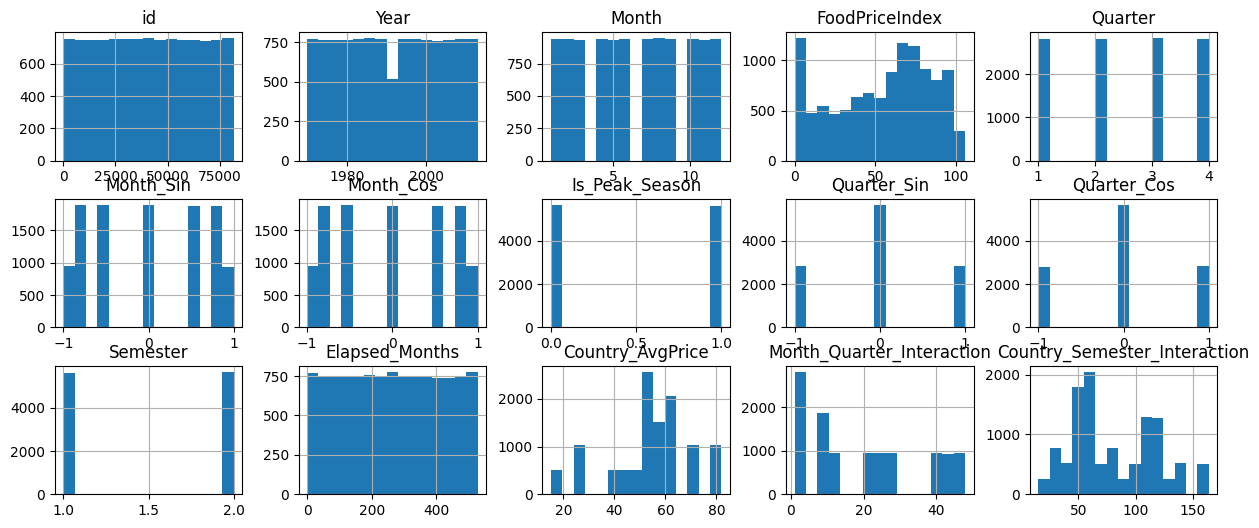

In [28]:
train[num_cols].hist(bins=15, figsize=(15, 6), layout=(3, 5));

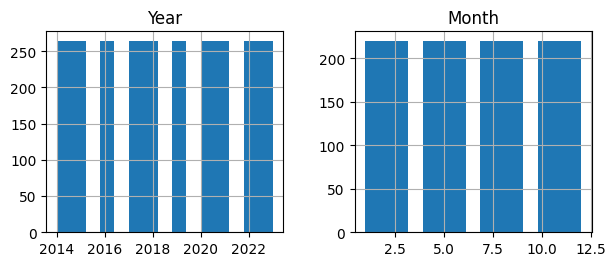

In [29]:
test[['Year', 'Month']].hist(bins=15, figsize=(15, 6), layout=(2, 4));

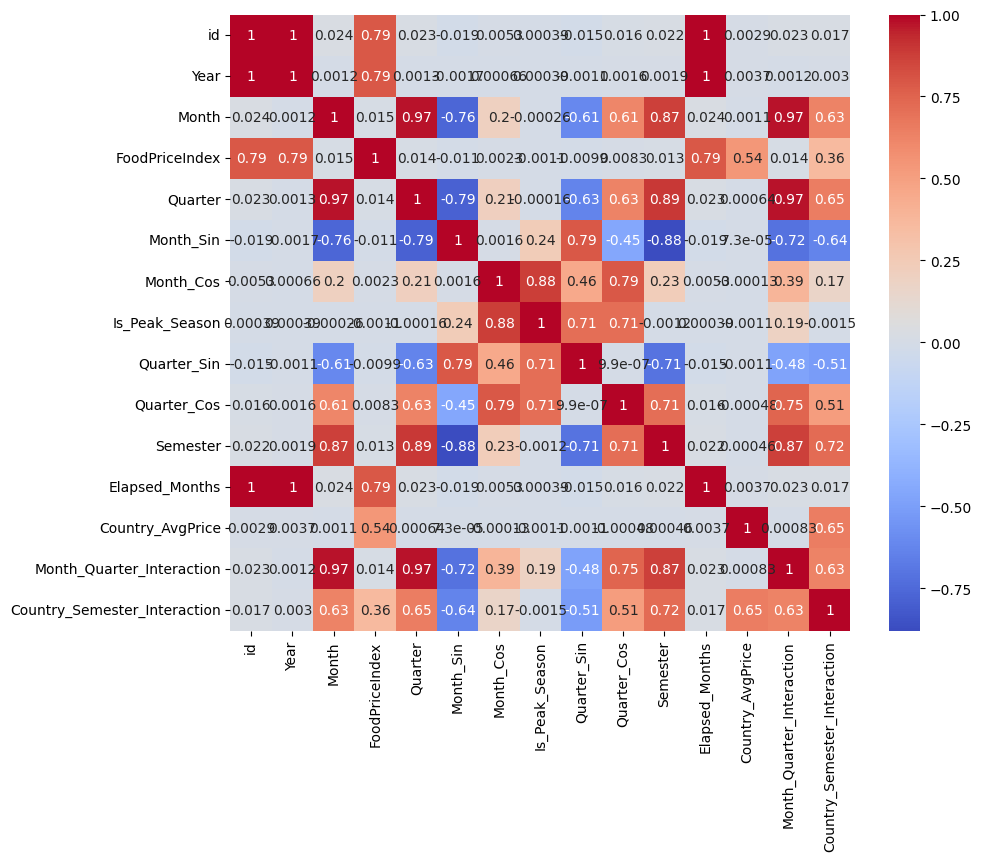

In [30]:
corr_mat = train.drop('Country', axis=1).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm')
plt.show()

In [31]:
# Combine 'Year' and 'Month' into a datetime format and sort the train
train['Date'] = pd.to_datetime(train[['Year', 'Month']].assign(Day=1))
train_sorted = train.sort_values(by='Date')

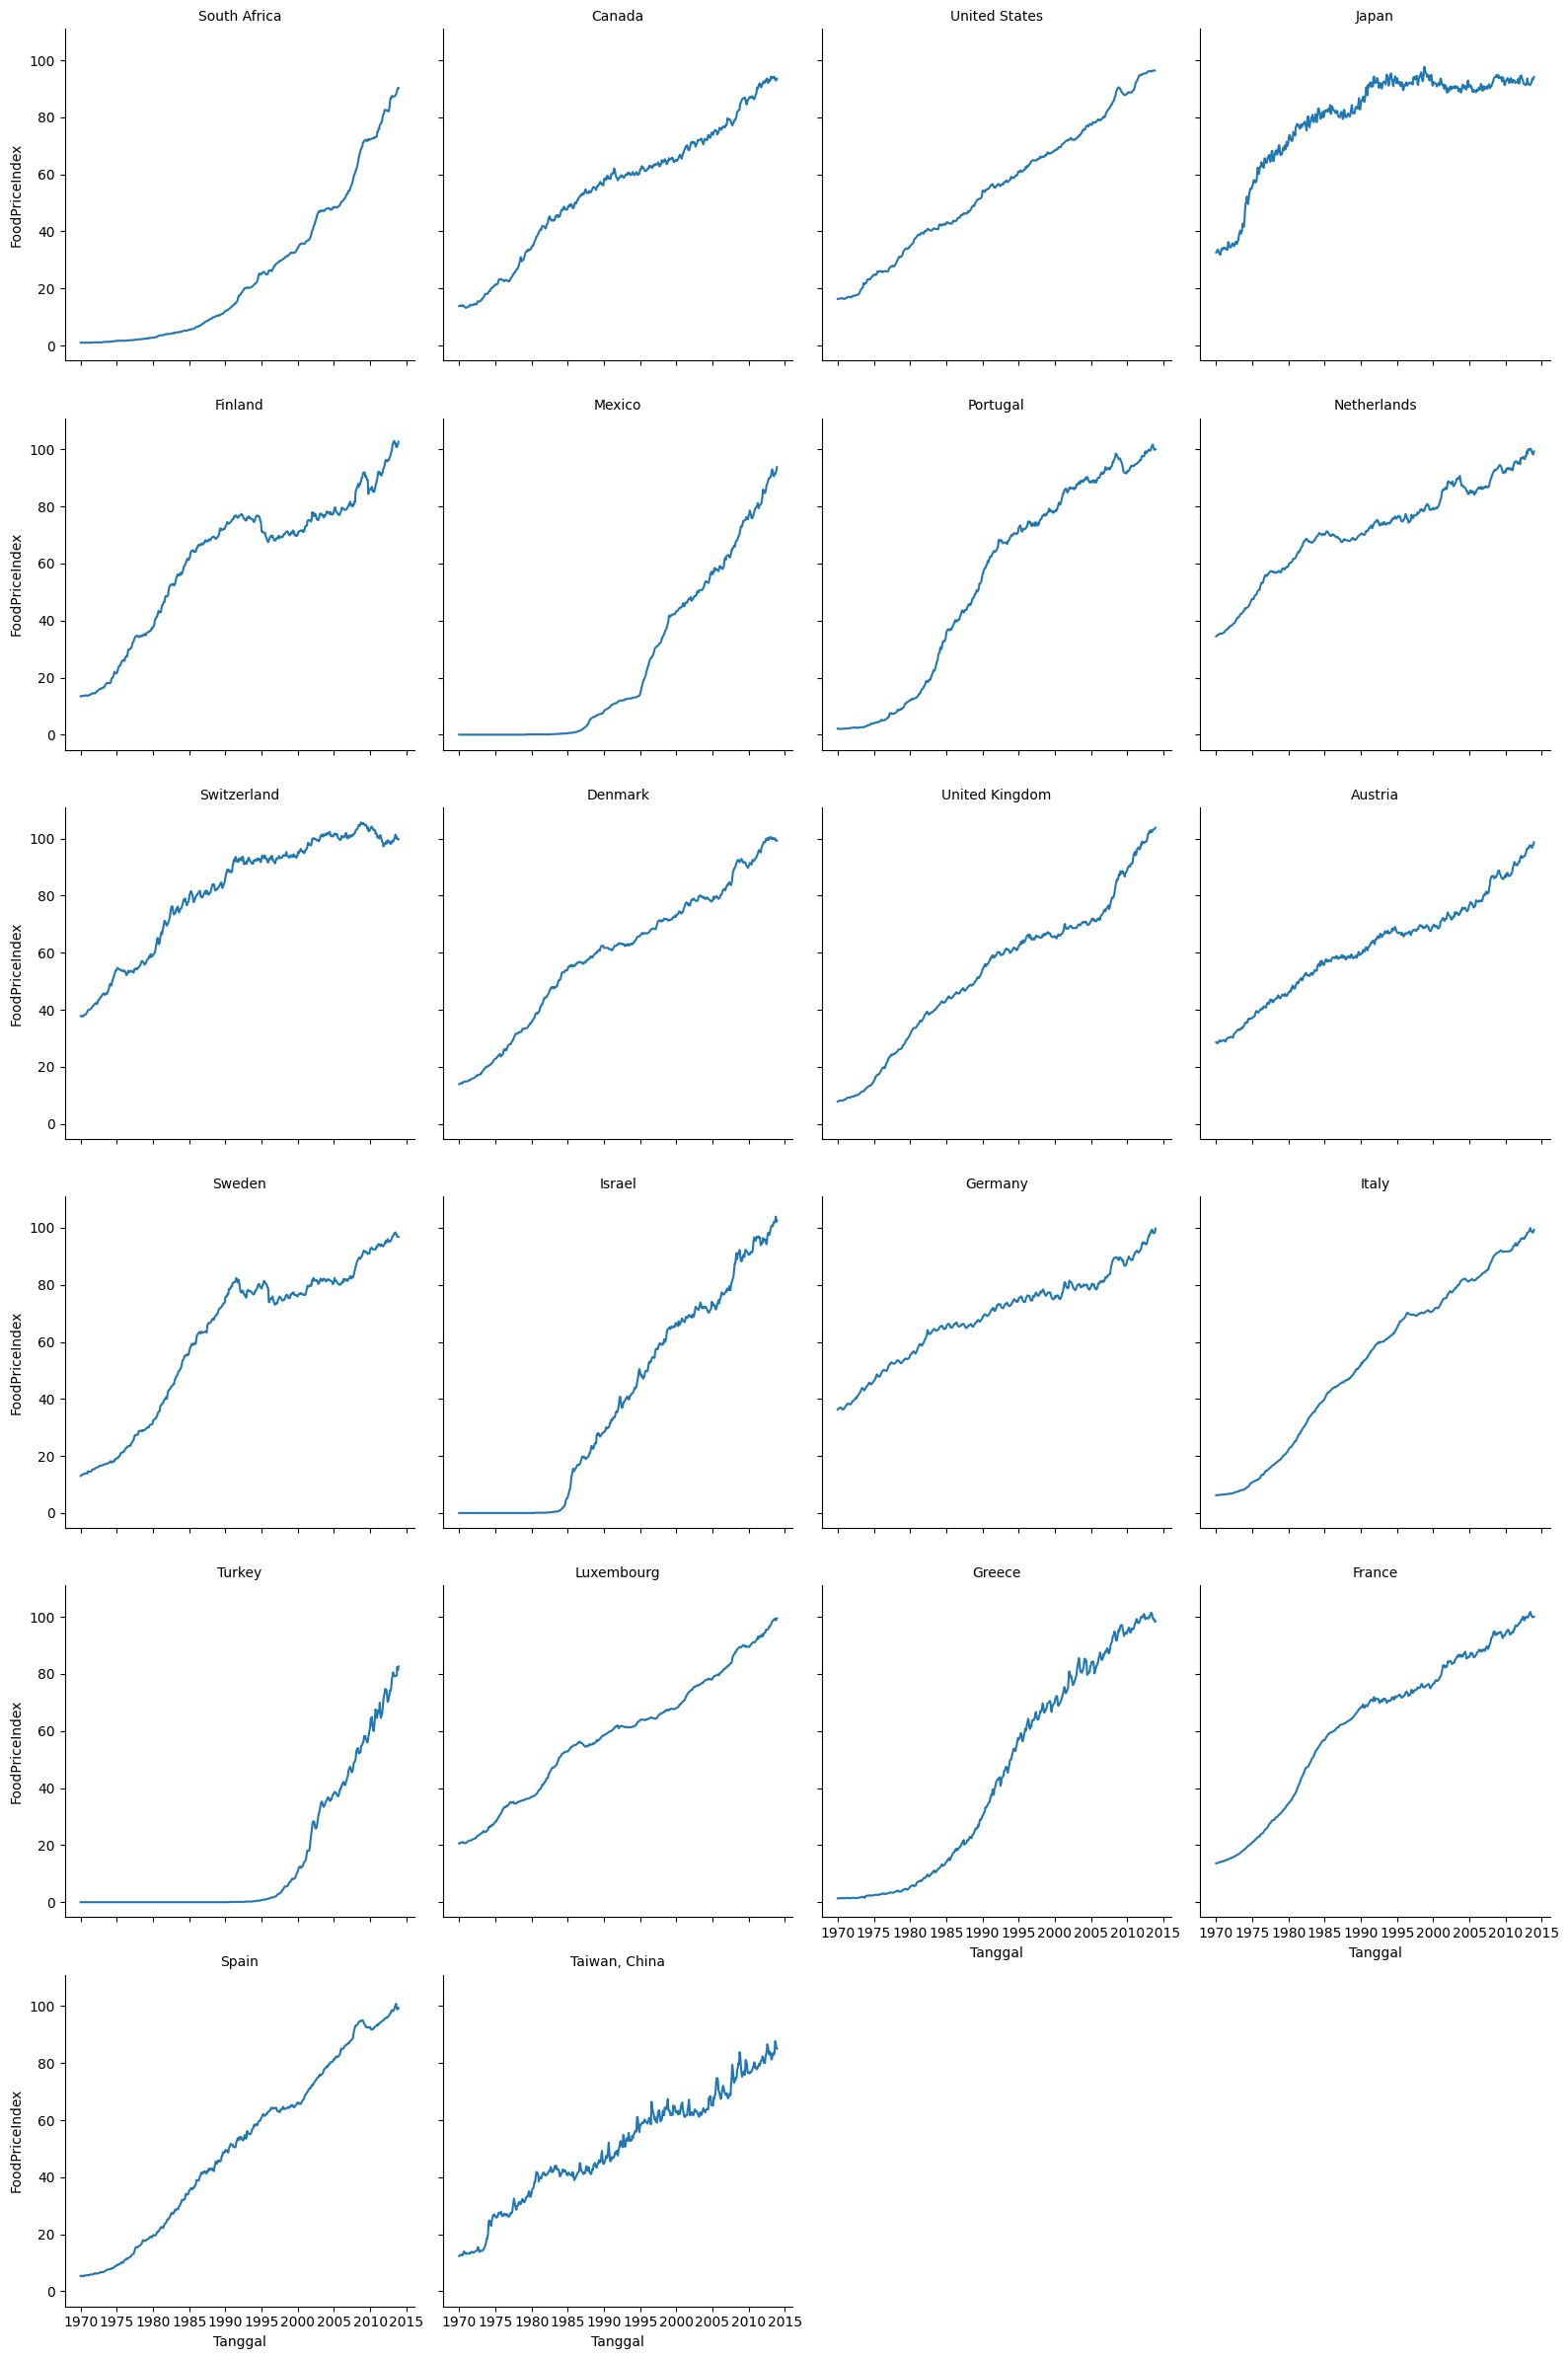

In [32]:
# Membuat FacetGrid untuk memisahkan tiap negara
g = sns.FacetGrid(train_sorted, col='Country', col_wrap=4, height=4)

# Plot tren FoodPriceIndex untuk tiap negara
g.map(sns.lineplot, 'Date', 'FoodPriceIndex')

# Menambahkan judul dan label
g.set_axis_labels('Tanggal', 'FoodPriceIndex')
g.set_titles('{col_name}')

# Menampilkan plot
plt.tight_layout()
plt.show()

# Modeling

In [34]:
X = train.drop(columns=['FoodPriceIndex', 'id', 'Date'])
y = train['FoodPriceIndex']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

te = ce.TargetEncoder(cols=['Country'])
X_train = te.fit_transform(X_train, y_train)
X_val = te.transform(X_val)

In [35]:
X_train

,Country,Year,Month,Quarter,Month_Sin,Month_Cos,Is_Peak_Season,Quarter_Sin,Quarter_Cos,Semester,Elapsed_Months,Country_AvgPrice,Month_Quarter_Interaction,Country_Semester_Interaction
10426,52.708049,1999,5,2,5.000000e-01,-0.866025,0,1.224647e-16,-1.000000e+00,1,352,53.095517,10,53.095517
6551,59.943839,1992,11,4,-5.000000e-01,0.866025,1,-2.449294e-16,1.000000e+00,2,274,59.473870,44,118.947741
8899,71.744059,1990,2,1,8.660254e-01,0.500000,1,1.000000e+00,6.123234e-17,1,241,71.803340,2,71.803340
11548,25.432524,2010,6,2,1.224647e-16,-1.000000,0,1.224647e-16,-1.000000e+00,1,485,25.490485,12,25.490485
9181,71.744059,2001,6,2,1.224647e-16,-1.000000,0,1.224647e-16,-1.000000e+00,1,377,71.803340,12,71.803340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5923,38.852580,1975,6,2,1.224647e-16,-1.000000,0,1.224647e-16,-1.000000e+00,1,65,38.772515,12,38.772515
5366,50.129975,2004,2,1,8.660254e-01,0.500000,1,1.000000e+00,6.123234e-17,1,409,50.526282,2,50.526282
5569,68.940091,2012,4,2,8.660254e-01,-0.500000,0,1.224647e-16,-1.000000e+00,1,507,68.830241,8,68.830241
884,15.753071,1995,10,4,-8.660254e-01,0.500000,1,-2.449294e-16,1.000000e+00,2,309,15.111868,40,30.223735


In [36]:
X_val

,Country,Year,Month,Quarter,Month_Sin,Month_Cos,Is_Peak_Season,Quarter_Sin,Quarter_Cos,Semester,Elapsed_Months,Country_AvgPrice,Month_Quarter_Interaction,Country_Semester_Interaction
3624,52.863504,2011,7,3,-5.000000e-01,-8.660254e-01,0,-1.000000e+00,-1.836970e-16,2,498,53.005859,21,106.011719
2591,50.129975,2013,3,1,1.000000e+00,6.123234e-17,1,1.000000e+00,6.123234e-17,1,518,50.526282,3,50.526282
4006,59.144819,2012,9,3,-1.000000e+00,-1.836970e-16,0,-1.000000e+00,-1.836970e-16,2,512,59.003770,27,118.007540
5448,55.844630,1985,12,4,-2.449294e-16,1.000000e+00,1,-2.449294e-16,1.000000e+00,2,191,54.994912,48,109.989824
11138,55.878469,1988,10,4,-8.660254e-01,5.000000e-01,1,-2.449294e-16,1.000000e+00,2,225,55.588998,40,111.177996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4116,38.852580,1970,11,4,-5.000000e-01,8.660254e-01,1,-2.449294e-16,1.000000e+00,2,10,38.772515,44,77.545029
6195,80.799512,1975,2,1,8.660254e-01,5.000000e-01,1,1.000000e+00,6.123234e-17,1,61,80.070155,2,80.070155
2433,25.432524,1984,12,4,-2.449294e-16,1.000000e+00,1,-2.449294e-16,1.000000e+00,2,179,25.490485,48,50.980971
5795,55.844630,1983,3,1,1.000000e+00,6.123234e-17,1,1.000000e+00,6.123234e-17,1,158,54.994912,3,54.994912


In [37]:
# Calculate sMAPE
def smape(A, F):
    denominator = np.abs(A) + np.abs(F)
    numerator = 2 * np.abs(F - A)
    print(f"Denominator: {denominator}")
    print(f"Numerator: {numerator}")
    return 100/len(A) * np.sum(numerator / denominator)

In [38]:
# Sort data by Year and Month to ensure time series order
X_train_sorted = pd.concat([y_train, X_train], axis=1).sort_values(['Year', 'Month'])
X_val_sorted = pd.concat([y_val, X_val], axis=1).sort_values(['Year', 'Month'])

In [39]:
X_train_sorted['Year'].max(), X_val_sorted['Year'].min()

(2013, 1970)

# Feature Selection

In [40]:
X_train_sorted

,FoodPriceIndex,Country,Year,Month,Quarter,Month_Sin,Month_Cos,Is_Peak_Season,Quarter_Sin,Quarter_Cos,Semester,Elapsed_Months,Country_AvgPrice,Month_Quarter_Interaction,Country_Semester_Interaction
974,37.80,82.479800,1970,1,1,5.000000e-01,0.866025,1,1.000000e+00,6.123234e-17,1,0,81.941732,1,81.941732
7828,0.00,38.852580,1970,1,1,5.000000e-01,0.866025,1,1.000000e+00,6.123234e-17,1,0,38.772515,1,38.772515
4860,12.40,50.129975,1970,1,1,5.000000e-01,0.866025,1,1.000000e+00,6.123234e-17,1,0,50.526282,1,50.526282
11251,16.30,55.878469,1970,1,1,5.000000e-01,0.866025,1,1.000000e+00,6.123234e-17,1,0,55.588998,1,55.588998
3938,13.80,55.844630,1970,1,1,5.000000e-01,0.866025,1,1.000000e+00,6.123234e-17,1,0,54.994912,1,54.994912
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7596,93.80,25.432524,2013,12,4,-2.449294e-16,1.000000,1,-2.449294e-16,1.000000e+00,2,527,25.490485,48,50.980971
2578,102.70,61.804077,2013,12,4,-2.449294e-16,1.000000,1,-2.449294e-16,1.000000e+00,2,527,61.852023,48,123.704046
3990,100.00,54.484652,2013,12,4,-2.449294e-16,1.000000,1,-2.449294e-16,1.000000e+00,2,527,53.359259,48,106.718519
1040,85.06,50.129975,2013,12,4,-2.449294e-16,1.000000,1,-2.449294e-16,1.000000e+00,2,527,50.526282,48,101.052564


### ANOVA

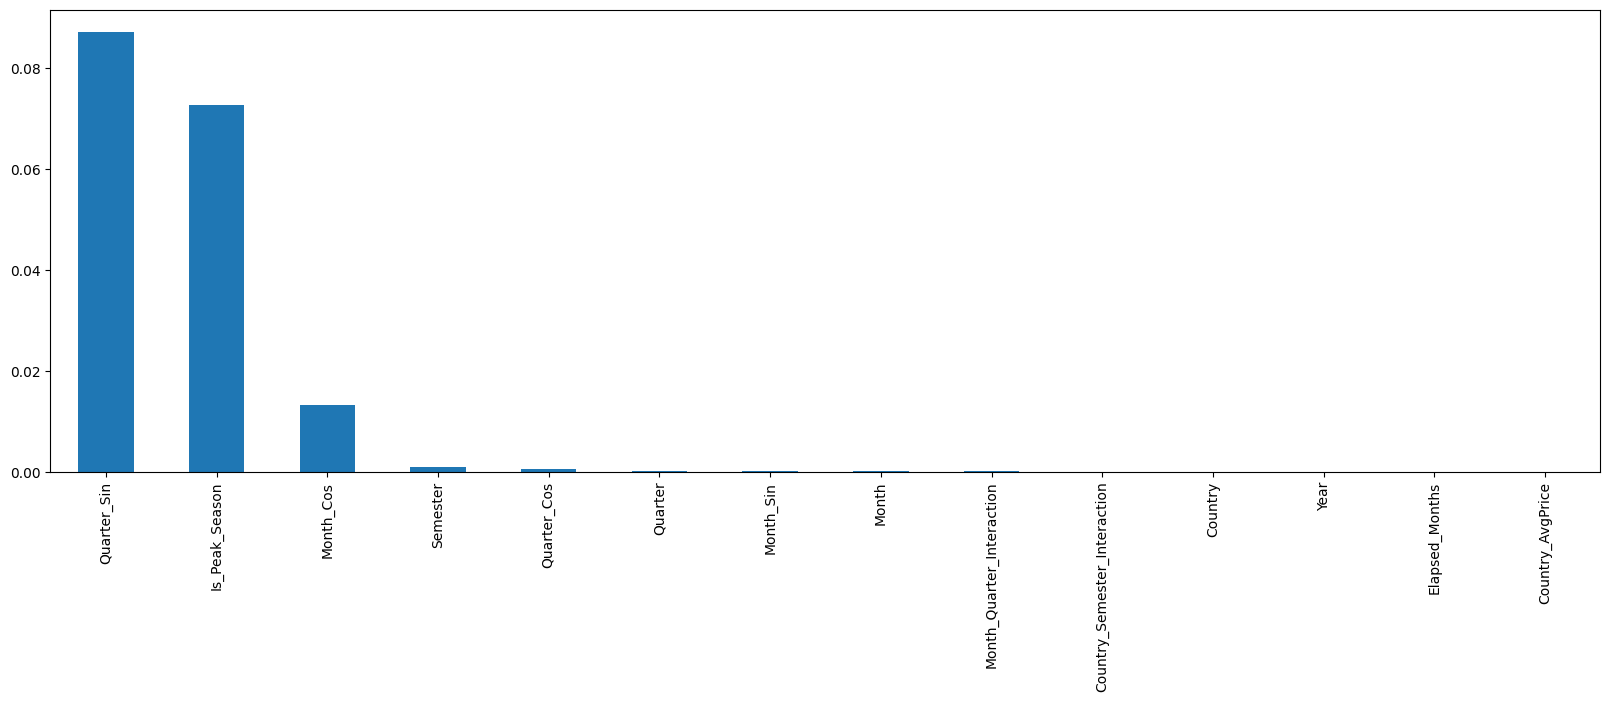

Index(['Country', 'Year', 'Month', 'Quarter', 'Month_Sin', 'Quarter_Cos',
       'Elapsed_Months', 'Country_AvgPrice', 'Month_Quarter_Interaction',
       'Country_Semester_Interaction'],
      dtype='object')

In [42]:
from sklearn.feature_selection import f_classif

# to select features
from sklearn.feature_selection import SelectKBest
univariate = f_classif(X_train, y_train)
univariate = pd.Series(univariate[1])
univariate.index = X_train.columns
univariate.sort_values(ascending=False).plot.bar(figsize=(20, 6))
plt.show()

# select the top 10 features
sel_ = SelectKBest(f_classif, k=10).fit(X_train, y_train)

# display selected feature names
X_train.columns[sel_.get_support()]

In [60]:
selected_features = X.columns[sel_.get_support()]
print("Fitur yang terpilih:", selected_features)

Fitur yang terpilih: Index(['Country', 'Year', 'Month', 'Quarter', 'Month_Sin', 'Quarter_Cos',
       'Elapsed_Months', 'Country_AvgPrice', 'Month_Quarter_Interaction',
       'Country_Semester_Interaction'],
      dtype='object')


### Recursive Feature Elimination (RFE)

In [54]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

# Perform RFE to select 5 features
rfe = RFE(model)
X_rfe = rfe.fit_transform(X_train, y_train)

# Train model with selected features
model.fit(X_rfe, y_train)

# val model on transformed val data
X_val_rfe = rfe.transform(X_val)
print(f"val Score: {model.score(X_val_rfe, y_val)}")


val Score: 0.9996296953801015


In [58]:
selected_features = X.columns[rfe.support_]
print("Fitur yang terpilih:", selected_features)

Fitur yang terpilih: Index(['Country', 'Year', 'Month_Sin', 'Elapsed_Months', 'Country_AvgPrice',
       'Month_Quarter_Interaction', 'Country_Semester_Interaction'],
      dtype='object')


### Lasso (L1 Regularization)


In [57]:
from sklearn.linear_model import Lasso
# Apply Lasso regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

# Evaluate the model
print(f"val Score: {lasso.score(X_val, y_val)}")
print(f"Selected Features: {lasso.coef_ != 0}")


val Score: 0.912209086341712
Selected Features: [ True  True False False False False False False False False  True  True
  True  True]


C:\Users\booma\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.508e+03, tolerance: 8.193e+02
  model = cd_fast.enet_coordinate_descent(


In [59]:
selected_features = X.columns[lasso.coef_ != 0]
print("Fitur yang terpilih:", selected_features)

Fitur yang terpilih: Index(['Country', 'Year', 'Elapsed_Months', 'Country_AvgPrice',
       'Month_Quarter_Interaction', 'Country_Semester_Interaction'],
      dtype='object')


### Feature Importance from Random Forest

In [55]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_
print(f"Feature Importances: {importances}")


Feature Importances: [1.84134884e-01 4.26170716e-02 5.61700841e-05 1.90099490e-05
 7.77930961e-05 7.02287660e-05 1.65692652e-05 2.46175504e-05
 2.10768915e-05 8.67575156e-06 6.20468882e-01 1.52075756e-01
 5.79005485e-05 3.51363979e-04]


In [42]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_absolute_percentage_error
# import matplotlib.pyplot as plt

# # Dictionary untuk menyimpan sMAPE dan model per negara
# models = {}
# smape_scores = {}

# # Daftar negara unik
# countries = X_train_sorted['Country'].unique()

# # Iterasi untuk tiap negara
# for country in countries:
#     print(f"Training model for country: {country}")
    
#     # Filter data untuk negara tertentu
#     train_data = X_train_sorted[X_train_sorted['Country'] == country]
#     val_data = X_val_sorted[X_val_sorted['Country'] == country]
    
#     # Fitur dan target
#     X_train = train_data[['Year', 'Month', 'Quarter', 'Month_Sin', 'Month_Cos', 'Is_Peak_Season', 'Quarter_Sin']]
#     y_train = train_data['FoodPriceIndex']
#     X_val = val_data[['Year', 'Month', 'Quarter', 'Month_Sin', 'Month_Cos', 'Is_Peak_Season', 'Quarter_Sin']]
#     y_val = val_data['FoodPriceIndex']
    
#     # train the model
#     rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
#     rf_model.fit(X_train, y_train)
    
#     # Predict
#     predictions = rf_model.predict(X_val)
    
#     # Calculate sMAPE
#     smape_value = smape(y_val.values, predictions)
#     smape_scores[country] = smape_value
    
#     # Store the model
#     models[country] = rf_model
    
#     # Plot actual vs predicted for the country
#     plt.figure(figsize=(10, 5))
#     plt.plot(y_val.values, label='Actual')
#     plt.plot(predictions, label='Predicted')
#     plt.title(f'{country}: Actual vs Predicted Values')
#     plt.xlabel('Data Index')
#     plt.ylabel('FoodPriceIndex')
#     plt.legend()
#     plt.show()

# # Print sMAPE for each country
# print("\nModel Performance (sMAPE per Country):")
# for country, score in smape_scores.items():
#     print(f"{country}: {score:.2f}%")


In [47]:
train_sorted = X_train_sorted.copy()
val_sorted = X_val_sorted.copy()


X_train_sorted = train_sorted.drop(['FoodPriceIndex'], axis=1)
y_train_sorted = train_sorted['FoodPriceIndex']

X_val_sorted = val_sorted.drop(['FoodPriceIndex'], axis=1)
y_val_sorted = val_sorted['FoodPriceIndex']

In [48]:
X_train_sorted

,Country,Year,Month,Quarter,Month_Sin,Month_Cos,Is_Peak_Season,Quarter_Sin,Quarter_Cos,Semester,Elapsed_Months,Country_AvgPrice,Month_Quarter_Interaction,Country_Semester_Interaction
974,82.479800,1970,1,1,5.000000e-01,0.866025,1,1.000000e+00,6.123234e-17,1,0,81.941732,1,81.941732
7828,38.852580,1970,1,1,5.000000e-01,0.866025,1,1.000000e+00,6.123234e-17,1,0,38.772515,1,38.772515
4860,50.129975,1970,1,1,5.000000e-01,0.866025,1,1.000000e+00,6.123234e-17,1,0,50.526282,1,50.526282
11251,55.878469,1970,1,1,5.000000e-01,0.866025,1,1.000000e+00,6.123234e-17,1,0,55.588998,1,55.588998
3938,55.844630,1970,1,1,5.000000e-01,0.866025,1,1.000000e+00,6.123234e-17,1,0,54.994912,1,54.994912
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7596,25.432524,2013,12,4,-2.449294e-16,1.000000,1,-2.449294e-16,1.000000e+00,2,527,25.490485,48,50.980971
2578,61.804077,2013,12,4,-2.449294e-16,1.000000,1,-2.449294e-16,1.000000e+00,2,527,61.852023,48,123.704046
3990,54.484652,2013,12,4,-2.449294e-16,1.000000,1,-2.449294e-16,1.000000e+00,2,527,53.359259,48,106.718519
1040,50.129975,2013,12,4,-2.449294e-16,1.000000,1,-2.449294e-16,1.000000e+00,2,527,50.526282,48,101.052564


In [49]:
X_train_sorted.drop('Is_Peak_Season', axis = 1, inplace=True)
X_val_sorted.drop('Is_Peak_Season', axis = 1, inplace=True)

In [50]:
X_train_sorted.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9014 entries, 974 to 11437
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       9014 non-null   float64
 1   Year                          9014 non-null   int64  
 2   Month                         9014 non-null   int64  
 3   Quarter                       9014 non-null   int64  
 4   Month_Sin                     9014 non-null   float64
 5   Month_Cos                     9014 non-null   float64
 6   Quarter_Sin                   9014 non-null   float64
 7   Quarter_Cos                   9014 non-null   float64
 8   Semester                      9014 non-null   int64  
 9   Elapsed_Months                9014 non-null   int64  
 10  Country_AvgPrice              9014 non-null   float64
 11  Month_Quarter_Interaction     9014 non-null   int64  
 12  Country_Semester_Interaction  9014 non-null   float64
dtypes: fl

sMAPE: 1.56%


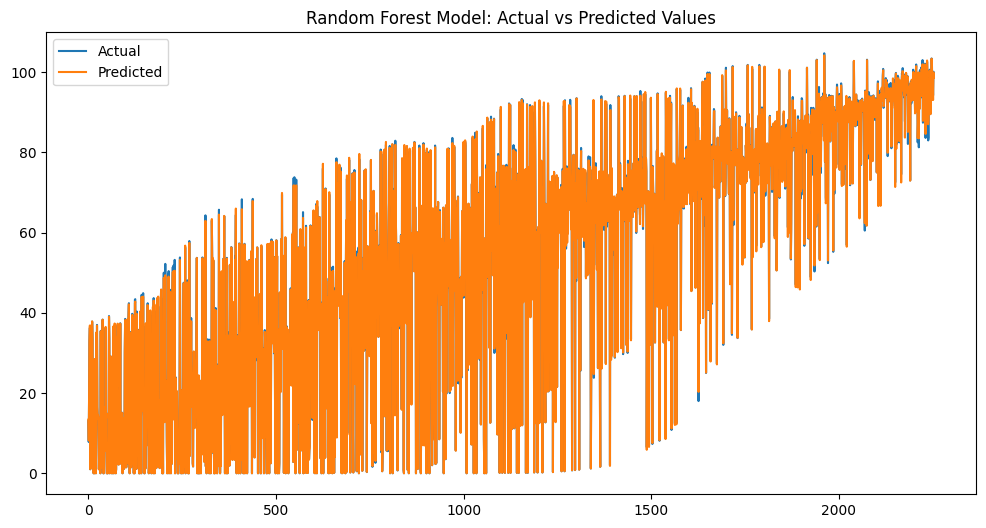

In [51]:
from sklearn.ensemble import RandomForestRegressor
# Initialize and train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_sorted, y_train_sorted)

# Make predictions
rf_predictions = rf_model.predict(X_val_sorted)

# Calculate sMAPE
def smape(y_true, y_pred, epsilon=1e-10):
    return 100 * np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred) + epsilon))

smape_rf = smape(y_val_sorted.values, rf_predictions)
print(f'sMAPE: {smape_rf:.2f}%')

# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_val_sorted.values, label='Actual')
plt.plot(rf_predictions, label='Predicted')
plt.title('Random Forest Model: Actual vs Predicted Values')
plt.legend()
plt.show()

sMAPE: 1.18%


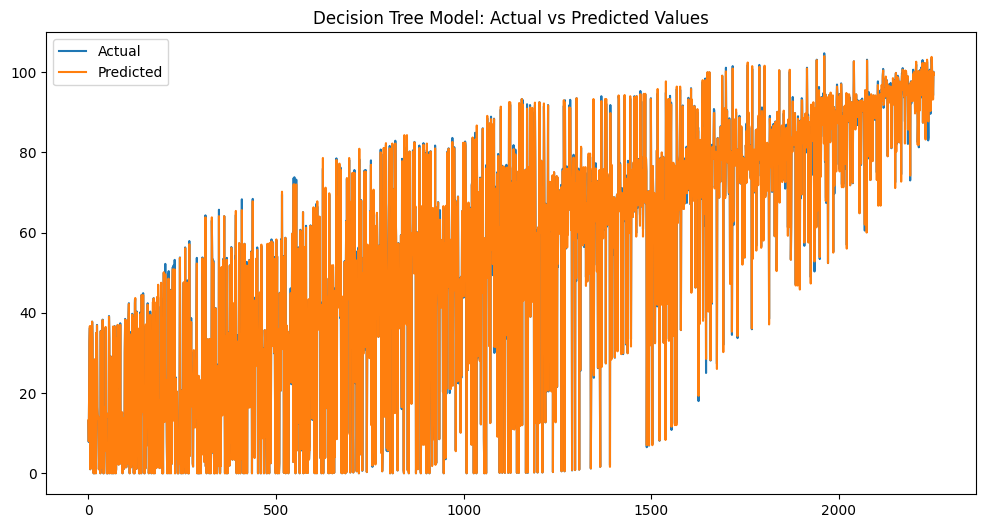

In [52]:
# Initialize and train the model
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train_sorted, y_train_sorted)

# Make predictions
dt_predictions = dt_model.predict(X_val_sorted)

# Calculate sMAPE
def smape(y_true, y_pred, epsilon=1e-10):
    return 100 * np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred) + epsilon))

smape_rf = smape(y_val_sorted.values, dt_predictions)
print(f'sMAPE: {smape_rf:.2f}%')

# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_val_sorted.values, label='Actual')
plt.plot(dt_predictions, label='Predicted')
plt.title('Decision Tree Model: Actual vs Predicted Values')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


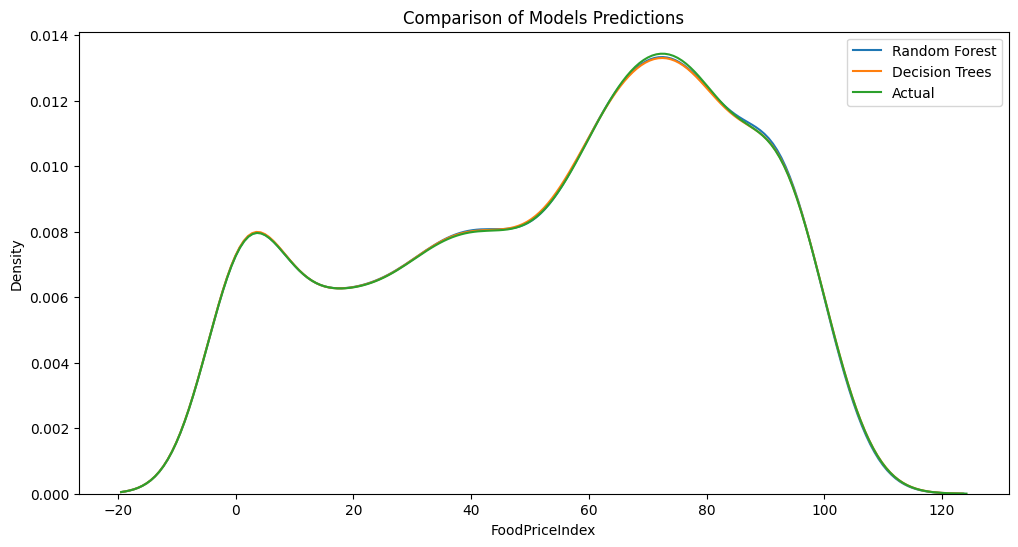

In [48]:
# kdeplot comparison between models predictions
plt.figure(figsize=(12, 6))
sns.kdeplot(rf_predictions, label='Random Forest')
sns.kdeplot(dt_predictions, label='Decision Trees')
sns.kdeplot(y_val_sorted, label='Actual')
plt.title('Comparison of Models Predictions')
plt.legend()
plt.show()

# Apply to test

In [49]:
test.drop('id', axis=1, inplace=True)

#transform the 'Country' column
test = te.transform(test)

test.head()

,Country,Year,Month,Quarter,Month_Sin,Month_Cos,Is_Peak_Season,Quarter_Sin,Quarter_Cos,Semester,Elapsed_Months,Country_AvgPrice,Month_Quarter_Interaction,Country_Semester_Interaction
0,52.708049,2023,4,2,8.660254e-01,-0.500000,0,1.224647e-16,-1.000000e+00,1,639,53.095517,8,53.095517
1,59.943839,2022,7,3,-5.000000e-01,-0.866025,0,-1.000000e+00,-1.836970e-16,2,630,59.473870,21,118.947741
2,55.878469,2019,6,2,1.224647e-16,-1.000000,0,1.224647e-16,-1.000000e+00,1,593,55.588998,12,55.588998
3,71.744059,2021,2,1,8.660254e-01,0.500000,1,1.000000e+00,6.123234e-17,1,613,71.803340,2,71.803340
4,52.708049,2019,8,3,-8.660254e-01,-0.500000,0,-1.000000e+00,-1.836970e-16,2,595,53.095517,24,106.191033


In [50]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2640 entries, 0 to 2639
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       2640 non-null   float64
 1   Year                          2640 non-null   int64  
 2   Month                         2640 non-null   int64  
 3   Quarter                       2640 non-null   int64  
 4   Month_Sin                     2640 non-null   float64
 5   Month_Cos                     2640 non-null   float64
 6   Is_Peak_Season                2640 non-null   int64  
 7   Quarter_Sin                   2640 non-null   float64
 8   Quarter_Cos                   2640 non-null   float64
 9   Semester                      2640 non-null   int64  
 10  Elapsed_Months                2640 non-null   int64  
 11  Country_AvgPrice              2640 non-null   float64
 12  Month_Quarter_Interaction     2640 non-null   int64  
 13  Cou

In [51]:
X_train_sorted

,Country,Year,Month,Quarter,Month_Sin,Month_Cos,Is_Peak_Season,Quarter_Sin,Quarter_Cos,Semester,Elapsed_Months,Country_AvgPrice,Month_Quarter_Interaction,Country_Semester_Interaction
974,82.479800,1970,1,1,5.000000e-01,0.866025,1,1.000000e+00,6.123234e-17,1,0,81.941732,1,81.941732
7828,38.852580,1970,1,1,5.000000e-01,0.866025,1,1.000000e+00,6.123234e-17,1,0,38.772515,1,38.772515
4860,50.129975,1970,1,1,5.000000e-01,0.866025,1,1.000000e+00,6.123234e-17,1,0,50.526282,1,50.526282
11251,55.878469,1970,1,1,5.000000e-01,0.866025,1,1.000000e+00,6.123234e-17,1,0,55.588998,1,55.588998
3938,55.844630,1970,1,1,5.000000e-01,0.866025,1,1.000000e+00,6.123234e-17,1,0,54.994912,1,54.994912
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7596,25.432524,2013,12,4,-2.449294e-16,1.000000,1,-2.449294e-16,1.000000e+00,2,527,25.490485,48,50.980971
2578,61.804077,2013,12,4,-2.449294e-16,1.000000,1,-2.449294e-16,1.000000e+00,2,527,61.852023,48,123.704046
3990,54.484652,2013,12,4,-2.449294e-16,1.000000,1,-2.449294e-16,1.000000e+00,2,527,53.359259,48,106.718519
1040,50.129975,2013,12,4,-2.449294e-16,1.000000,1,-2.449294e-16,1.000000e+00,2,527,50.526282,48,101.052564


In [52]:
test

,Country,Year,Month,Quarter,Month_Sin,Month_Cos,Is_Peak_Season,Quarter_Sin,Quarter_Cos,Semester,Elapsed_Months,Country_AvgPrice,Month_Quarter_Interaction,Country_Semester_Interaction
0,52.708049,2023,4,2,8.660254e-01,-5.000000e-01,0,1.224647e-16,-1.000000e+00,1,639,53.095517,8,53.095517
1,59.943839,2022,7,3,-5.000000e-01,-8.660254e-01,0,-1.000000e+00,-1.836970e-16,2,630,59.473870,21,118.947741
2,55.878469,2019,6,2,1.224647e-16,-1.000000e+00,0,1.224647e-16,-1.000000e+00,1,593,55.588998,12,55.588998
3,71.744059,2021,2,1,8.660254e-01,5.000000e-01,1,1.000000e+00,6.123234e-17,1,613,71.803340,2,71.803340
4,52.708049,2019,8,3,-8.660254e-01,-5.000000e-01,0,-1.000000e+00,-1.836970e-16,2,595,53.095517,24,106.191033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2635,61.501546,2022,2,1,8.660254e-01,5.000000e-01,1,1.000000e+00,6.123234e-17,1,625,62.355750,2,62.355750
2636,59.943839,2020,4,2,8.660254e-01,-5.000000e-01,0,1.224647e-16,-1.000000e+00,1,603,59.473870,8,59.473870
2637,43.888835,2017,1,1,5.000000e-01,8.660254e-01,1,1.000000e+00,6.123234e-17,1,564,43.862136,1,43.862136
2638,43.888835,2020,3,1,1.000000e+00,6.123234e-17,1,1.000000e+00,6.123234e-17,1,602,43.862136,3,43.862136


In [53]:
# apply predictions
test['FoodPriceIndex'] = dt_model.predict(test)
test

,Country,Year,Month,Quarter,Month_Sin,Month_Cos,Is_Peak_Season,Quarter_Sin,Quarter_Cos,Semester,Elapsed_Months,Country_AvgPrice,Month_Quarter_Interaction,Country_Semester_Interaction,FoodPriceIndex
0,52.708049,2023,4,2,8.660254e-01,-5.000000e-01,0,1.224647e-16,-1.000000e+00,1,639,53.095517,8,53.095517,98.7000
1,59.943839,2022,7,3,-5.000000e-01,-8.660254e-01,0,-1.000000e+00,-1.836970e-16,2,630,59.473870,21,118.947741,99.8000
2,55.878469,2019,6,2,1.224647e-16,-1.000000e+00,0,1.224647e-16,-1.000000e+00,1,593,55.588998,12,55.588998,96.3000
3,71.744059,2021,2,1,8.660254e-01,5.000000e-01,1,1.000000e+00,6.123234e-17,1,613,71.803340,2,71.803340,99.6674
4,52.708049,2019,8,3,-8.660254e-01,-5.000000e-01,0,-1.000000e+00,-1.836970e-16,2,595,53.095517,24,106.191033,100.8000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2635,61.501546,2022,2,1,8.660254e-01,5.000000e-01,1,1.000000e+00,6.123234e-17,1,625,62.355750,2,62.355750,100.3000
2636,59.943839,2020,4,2,8.660254e-01,-5.000000e-01,0,1.224647e-16,-1.000000e+00,1,603,59.473870,8,59.473870,99.8000
2637,43.888835,2017,1,1,5.000000e-01,8.660254e-01,1,1.000000e+00,6.123234e-17,1,564,43.862136,1,43.862136,100.0000
2638,43.888835,2020,3,1,1.000000e+00,6.123234e-17,1,1.000000e+00,6.123234e-17,1,602,43.862136,3,43.862136,100.8000


In [54]:
test

,Country,Year,Month,Quarter,Month_Sin,Month_Cos,Is_Peak_Season,Quarter_Sin,Quarter_Cos,Semester,Elapsed_Months,Country_AvgPrice,Month_Quarter_Interaction,Country_Semester_Interaction,FoodPriceIndex
0,52.708049,2023,4,2,8.660254e-01,-5.000000e-01,0,1.224647e-16,-1.000000e+00,1,639,53.095517,8,53.095517,98.7000
1,59.943839,2022,7,3,-5.000000e-01,-8.660254e-01,0,-1.000000e+00,-1.836970e-16,2,630,59.473870,21,118.947741,99.8000
2,55.878469,2019,6,2,1.224647e-16,-1.000000e+00,0,1.224647e-16,-1.000000e+00,1,593,55.588998,12,55.588998,96.3000
3,71.744059,2021,2,1,8.660254e-01,5.000000e-01,1,1.000000e+00,6.123234e-17,1,613,71.803340,2,71.803340,99.6674
4,52.708049,2019,8,3,-8.660254e-01,-5.000000e-01,0,-1.000000e+00,-1.836970e-16,2,595,53.095517,24,106.191033,100.8000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2635,61.501546,2022,2,1,8.660254e-01,5.000000e-01,1,1.000000e+00,6.123234e-17,1,625,62.355750,2,62.355750,100.3000
2636,59.943839,2020,4,2,8.660254e-01,-5.000000e-01,0,1.224647e-16,-1.000000e+00,1,603,59.473870,8,59.473870,99.8000
2637,43.888835,2017,1,1,5.000000e-01,8.660254e-01,1,1.000000e+00,6.123234e-17,1,564,43.862136,1,43.862136,100.0000
2638,43.888835,2020,3,1,1.000000e+00,6.123234e-17,1,1.000000e+00,6.123234e-17,1,602,43.862136,3,43.862136,100.8000


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


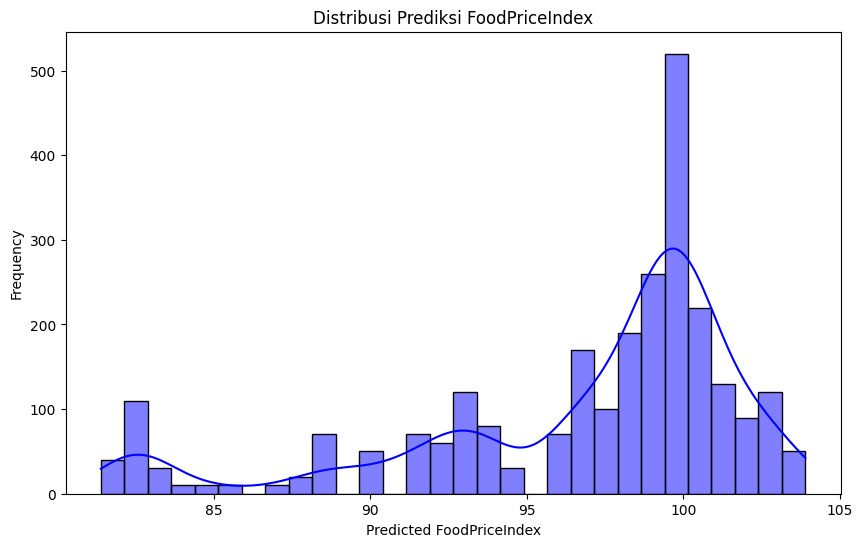

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram untuk persebaran hasil prediksi
plt.figure(figsize=(10, 6))
sns.histplot(test['FoodPriceIndex'], kde=True, bins=30, color='blue')
plt.title('Distribusi Prediksi FoodPriceIndex')
plt.xlabel('Predicted FoodPriceIndex')
plt.ylabel('Frequency')
plt.show()


# Submit

In [56]:
submission = pd.read_csv('/kaggle/input/data-mining-adikara/adikara2024-datamining/sample_submission_adikara2024.csv')
submission.head()

,id,FoodPriceIndex
0,99116,20.5
1,97687,20.5
2,92061,20.5
3,95122,20.5
4,92296,20.5


In [57]:
submission['FoodPriceIndex'] = test['FoodPriceIndex']
submission

,id,FoodPriceIndex
0,99116,98.7000
1,97687,99.8000
2,92061,96.3000
3,95122,99.6674
4,92296,100.8000
...,...,...
2635,96922,100.3000
2636,93502,99.8000
2637,87476,100.0000
2638,93366,100.8000


In [58]:
submission.to_csv("submission_dt_extractmany.csv", index=False)

In [59]:
submission.isnull().sum()

id                0
FoodPriceIndex    0
dtype: int64

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='FoodPriceIndex', ylabel='Density'>

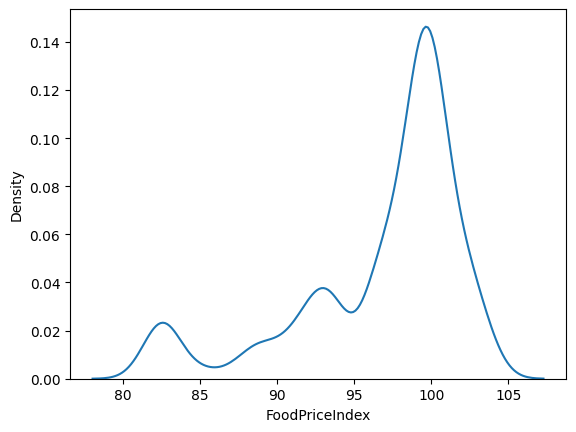

In [60]:
sns.kdeplot(submission['FoodPriceIndex'])

In [61]:
# import numpy as np
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense, Dropout
# from sklearn.preprocessing import MinMaxScaler

# # Dictionary untuk menyimpan model dan skor per negara
# models = {}
# smape_scores = {}

# # Daftar negara unik
# countries = X_train_sorted['Country'].unique()

# # Fungsi untuk membuat data menjadi sequence
# def create_sequences(data, target, seq_length=12):
#     X, y = [], []
#     for i in range(len(data) - seq_length):
#         X.append(data[i:i+seq_length])
#         y.append(target[i+seq_length])
#     return np.array(X), np.array(y)

# # Iterasi untuk tiap negara
# for country in countries:
#     print(f"Training model for country: {country}")
    
#     # Filter data untuk negara tertentu
#     train_data = X_train_sorted[X_train_sorted['Country'] == country]
#     val_data = X_val_sorted[X_val_sorted['Country'] == country]
    
#     # Fitur dan target
#     X_train = train_data[['Year', 'Month']].values
#     y_train = train_data['FoodPriceIndex'].values
#     X_val = val_data[['Year', 'Month']].values
#     y_val = val_data['FoodPriceIndex'].values

#     # Normalisasi data
#     scaler = MinMaxScaler()
#     X_train = scaler.fit_transform(X_train)
#     X_val = scaler.transform(X_val)

#     # Buat data sequence
#     seq_length = 12  # Panjang sequence (1 tahun)
#     X_train_seq, y_train_seq = create_sequences(X_train, y_train, seq_length)
#     X_val_seq, y_val_seq = create_sequences(X_val, y_val, seq_length)
    
#     # Bangun model LSTM
#     model = Sequential([
#         LSTM(64, activation='relu', input_shape=(seq_length, X_train_seq.shape[2]), return_sequences=True),
#         Dropout(0.2),
#         LSTM(32, activation='relu', return_sequences=False),
#         Dropout(0.2),
#         Dense(1)
#     ])
#     model.compile(optimizer='adam', loss='mse')
    
#     # Train model
#     model.fit(X_train_seq, y_train_seq, epochs=20, batch_size=32, validation_data=(X_val_seq, y_val_seq), verbose=0)
    
#     # Predict
#     predictions = model.predict(X_val_seq).flatten()
    
#     # Calculate sMAPE
#     smape_value = smape(y_val_seq, predictions)
#     smape_scores[country] = smape_value
    
#     # Store the model
#     models[country] = model
    
#     # Plot actual vs predicted for the country
#     plt.figure(figsize=(10, 5))
#     plt.plot(y_val_seq, label='Actual')
#     plt.plot(predictions, label='Predicted')
#     plt.title(f'{country}: Actual vs Predicted Values (RNN)')
#     plt.xlabel('Data Index')
#     plt.ylabel('FoodPriceIndex')
#     plt.legend()
#     plt.show()

# # Print sMAPE for each country
# print("\nModel Performance (sMAPE per Country):")
# for country, score in smape_scores.items():
#     print(f"{country}: {score:.2f}%")


In [62]:
# !pip install pytorch_forecasting

In [63]:
# import pytorch_forecasting
# from pytorch_forecasting import TemporalFusionTransformer
# from pytorch_forecasting.data import TimeSeriesDataSet
# from pytorch_forecasting.metrics import SMAPE
# from pytorch_forecasting.models import TemporalFusionTransformer
# import torch
# import matplotlib.pyplot as plt

# # Hyperparameters (define your own)
# LEARNING_RATE = 0.001
# DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# # Dictionary to store models and smape scores per country
# models = {}
# smape_scores = {}

# # List of unique countries
# countries = X_train_sorted['Country'].unique()

# # Iterate over each country
# for country in countries:
#     print(f"Training model for country: {country}")

#     # Filter data for the specific country
#     train_data = X_train_sorted[X_train_sorted['Country'] == country]
#     val_data = X_val_sorted[X_val_sorted['Country'] == country]

#     # Convert to time series dataset format using TimeSeriesDataSet
#     training_data = TimeSeriesDataSet(
#         train_data,
#         time_idx="Date",
#         target="FoodPriceIndex",
#         group_ids=["Country"],  # Group by country
#         min_encoder_length=12,  # Lookback period for input sequence
#         max_encoder_length=12,  # Lookback period for input sequence
#         min_prediction_length=1,
#         max_prediction_length=1,
#         static_categoricals=["Country"],
#         time_varying_real_features=["FoodPriceIndex"],  # Your input feature columns
#     )

#     validation_data = TimeSeriesDataSet(
#         val_data,
#         time_idx="Date",
#         target="FoodPriceIndex",
#         group_ids=["Country"],
#         min_encoder_length=12,
#         max_encoder_length=12,
#         min_prediction_length=1,
#         max_prediction_length=1,
#         static_categoricals=["Country"],
#         time_varying_real_features=["FoodPriceIndex"],
#     )

#     # Create DataLoader objects for batching
#     train_dataloader = torch.utils.data.DataLoader(training_data, batch_size=64, shuffle=True)
#     val_dataloader = torch.utils.data.DataLoader(validation_data, batch_size=64)

#     # Initialize TemporalFusionTransformer model
#     tft = TemporalFusionTransformer.from_dataset(
#         training_data,
#         learning_rate=LEARNING_RATE,
#         lstm_layers=2,
#         hidden_size=16,
#         attention_head_size=2,
#         dropout=0.2,
#         hidden_continuous_size=8,
#         output_size=1,  # Default to 1 quantile for prediction
#         loss=SMAPE(),
#         log_interval=10,
#         reduce_on_plateau_patience=4
#     )

#     # Move the model to the selected device (GPU or CPU)
#     tft.to(DEVICE)

#     # Print model size
#     print(f"Number of parameters in network: {tft.size()/1e3:.1f}k")

#     # Train the model for this country
#     trainer = pytorch_forecasting.Trainer(
#         max_epochs=50,
#         gpus=1 if torch.cuda.is_available() else 0,
#         gradient_clip_val=0.1,
#     )
#     trainer.fit(tft, train_dataloader=train_dataloader, val_dataloaders=val_dataloader)

#     # Save model for the country
#     models[country] = tft

#     # Predict with the trained model
#     predictions = tft.predict(val_dataloader, mode="raw")

#     # Calculate sMAPE score for the country
#     smape_value = SMAPE()(val_data['FoodPriceIndex'], predictions)
#     smape_scores[country] = smape_value

#     # Plot actual vs predicted
#     plt.figure(figsize=(10, 5))
#     plt.plot(val_data['Date'], val_data['FoodPriceIndex'], label="Actual")
#     plt.plot(val_data['Date'], predictions, label="Predicted")
#     plt.title(f"{country}: Actual vs Predicted (TFT)")
#     plt.xlabel('Time')
#     plt.ylabel('FoodPriceIndex')
#     plt.legend()
#     plt.show()

# # Print sMAPE for each country
# print("\nModel Performance (sMAPE per Country):")
# for country, score in smape_scores.items():
#     print(f"{country}: {score:.2f}%")
